In [84]:
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

In [85]:
s, fs = sf.read("nagranie.wav", dtype=np.float32)
t=np.arange(0,s.shape[0]/fs,1/fs)*1000

In [86]:
#sd.play(s,fs)
#status=sd.wait()

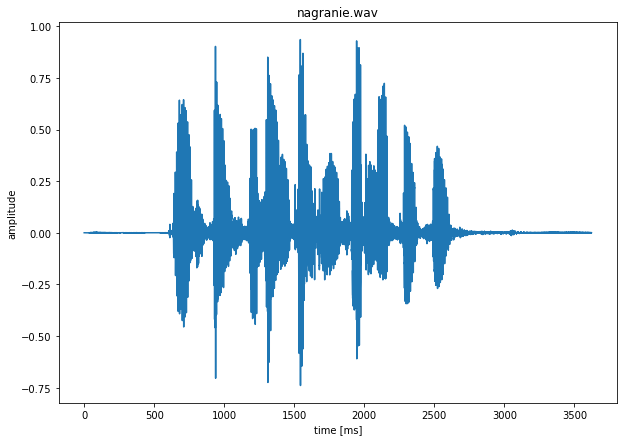

In [87]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.set_title("nagranie.wav")
ax.set_xlabel("time [ms]")
ax.set_ylabel("amplitude")
ax.plot(t,s)

plt.show()

# Frames

In [108]:
from sklearn import preprocessing
from numpy.lib.stride_tricks import sliding_window_view

def frame(t, s, dur):
    bins=np.arange(0, t.max()+dur, dur)
    indexes=np.digitize(t,bins)-1
    
    nframes=len(np.unique(indexes))
    E=np.zeros(nframes)
    Z=np.zeros(nframes)
    
    for i in range(nframes):
        E[i]=energy(s[indexes==i])
        Z[i]=zero_energy(s[indexes==i])
        
    return preprocessing.normalize(E.reshape(1,nframes)).ravel(), preprocessing.normalize(Z.reshape(1,nframes)).ravel()
    
def energy(frame):
    E=np.power(frame,2).sum()
    return E

def zero_energy(frame):
    tmp=sliding_window_view(frame, window_shape = 2)
    tmp=tmp[:,0]*tmp[:,1]
    tmp=np.where(tmp>=0, 0, 1)
    tmp=tmp.sum()
    return tmp

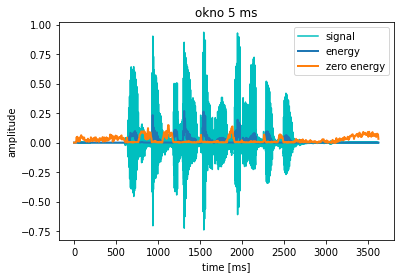

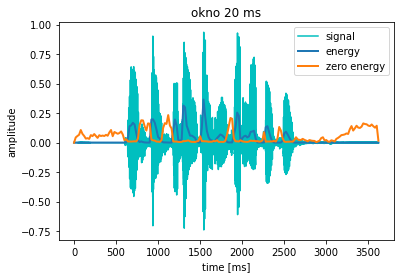

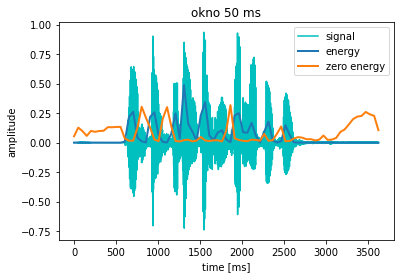

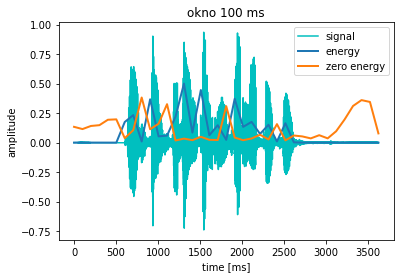

In [126]:
dur=[5,20,50,100]

for d in dur:
    E,Z=frame(t, s, d)
    framet=np.linspace(0,t.max(),len(E))

    plt.title(f"okno {d} ms")
    plt.xlabel("time [ms]")
    plt.ylabel("amplitude")

    plt.plot(t,s,'c',label='signal')
    plt.plot(framet, E, linewidth=2, label='energy')
    plt.plot(framet, Z, linewidth=2, label='zero energy')

    plt.legend()

    plt.show()

# Energia - spółgłoski
# Przejścia przez 0 - samogłoski